<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/SEL_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerías necesarias
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carga de BD desde drive

r_2015 ='/content/drive/MyDrive/analitica3/base_datos/r_2015_p.csv'
r_2016 ='/content/drive/MyDrive/analitica3/base_datos/r_2016_p.csv'

r_2015 = pd.read_csv(r_2015)
r_2016 = pd.read_csv(r_2016)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [ ]:
#cambiamos el nombre de la variable objetivo a target
r_2015 = r_2015.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2015 = r_2015.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2015 = le.fit_transform(y2015)

print(y2015[0:5])

print(le.classes_)

[1 1 1 1 1]
['Yes' 'no']


In [ ]:
#cambiamos el nombre de la variable objetivo a target
r_2016 = r_2016.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2016 = r_2016.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2016 = le.fit_transform(y2016)

print(y2016[0:5])

print(le.classes_)

[1 0 1 1 1]
['Yes' 'no']


In [ ]:
r_2015=r_2015.drop(['Unnamed: 0'],axis=1)

In [ ]:
r_2016=r_2016.drop(['Unnamed: 0'],axis=1)

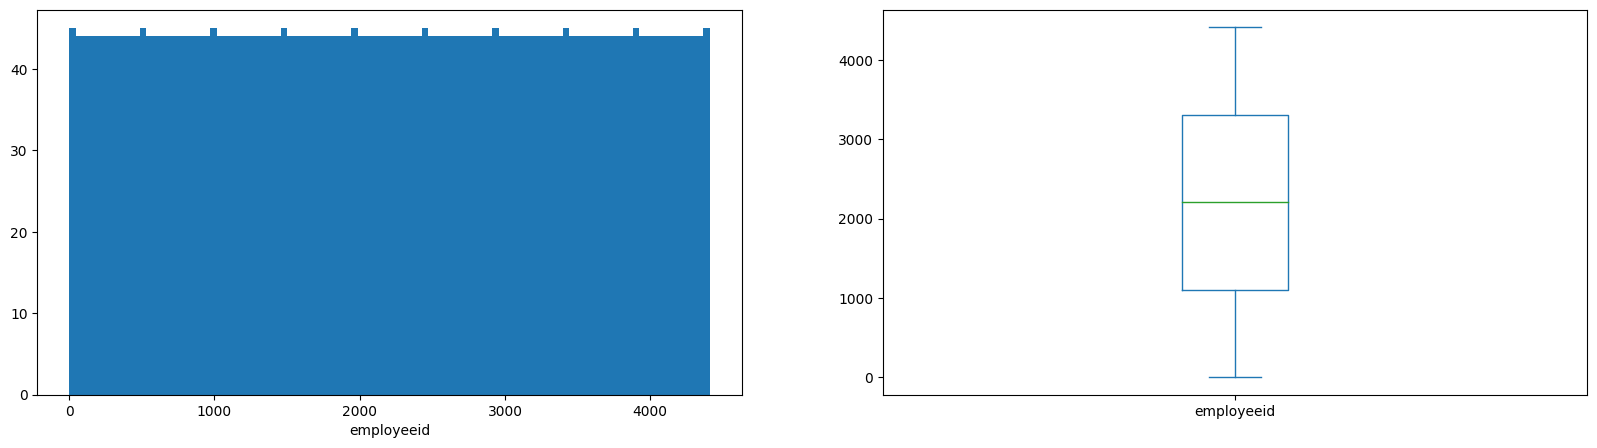

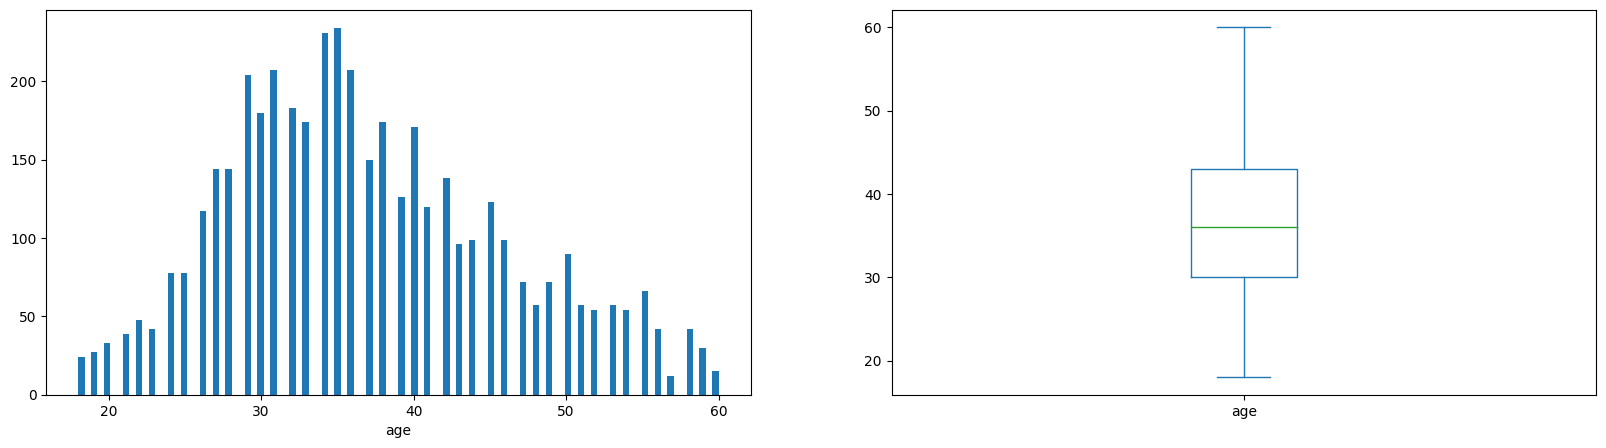

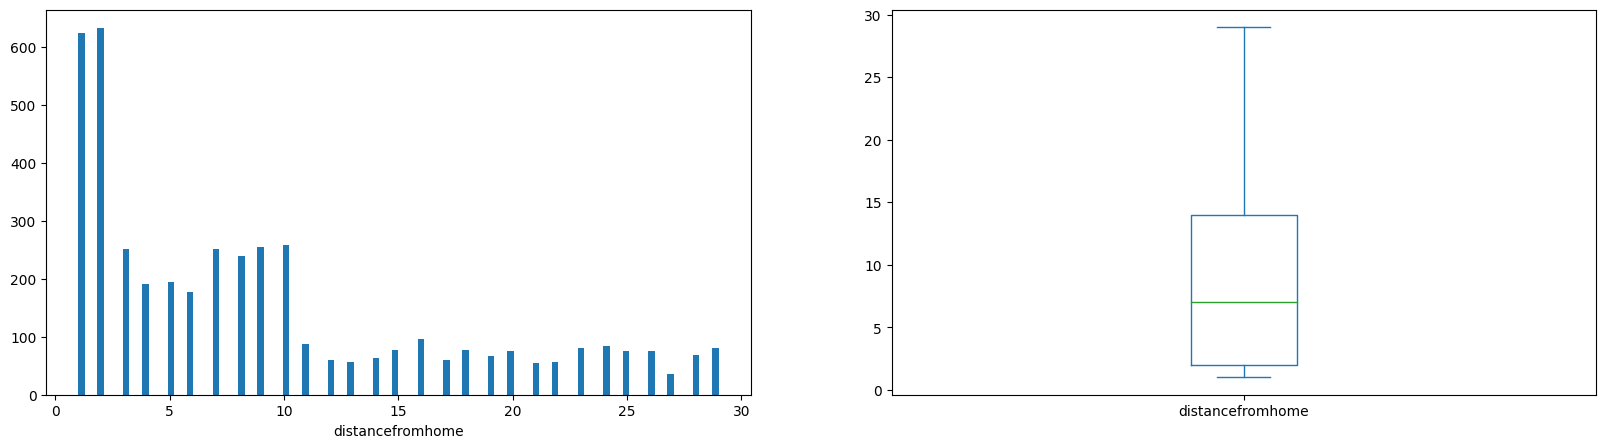

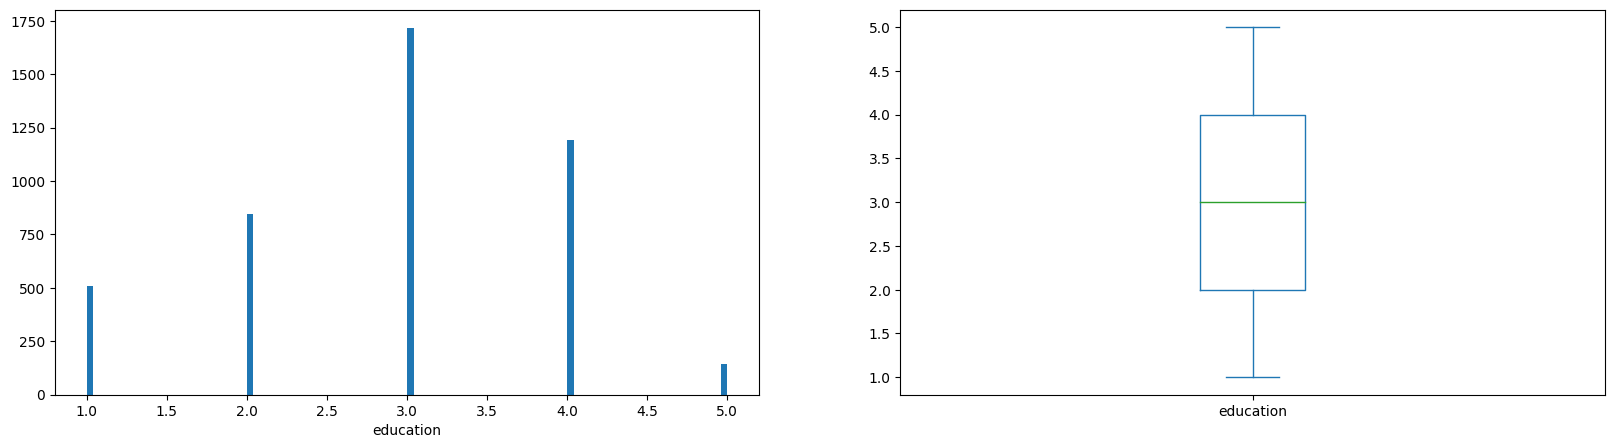

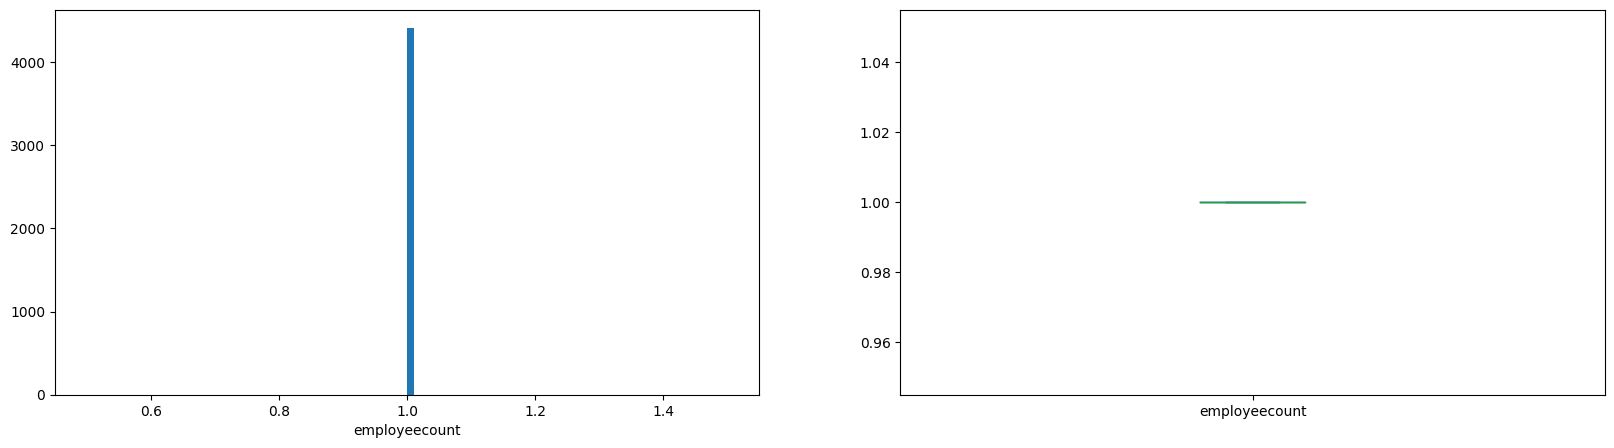

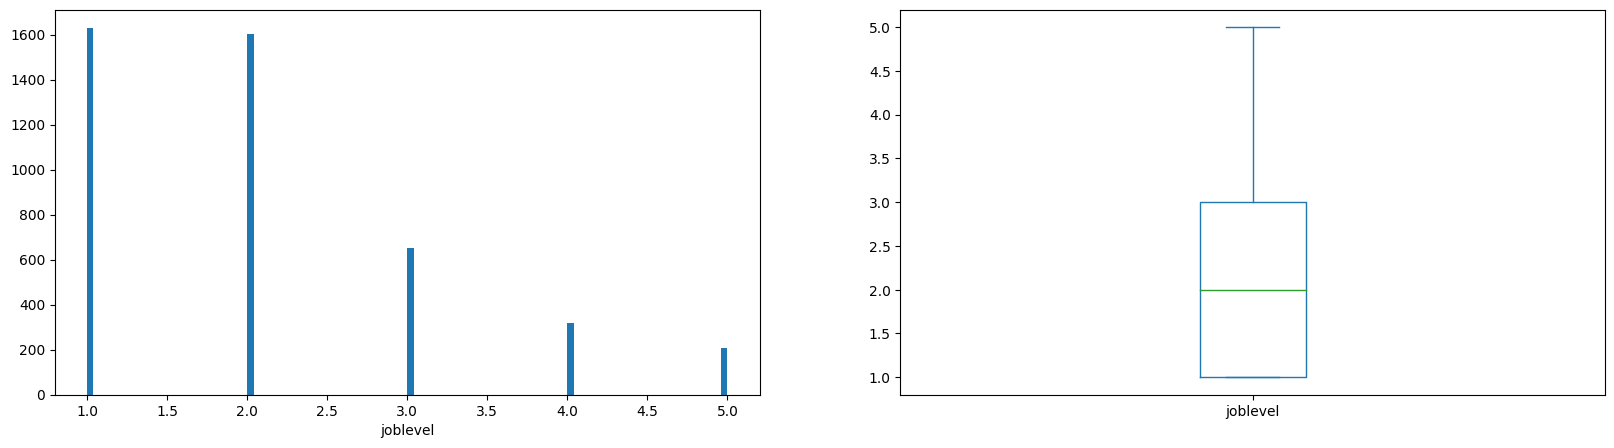

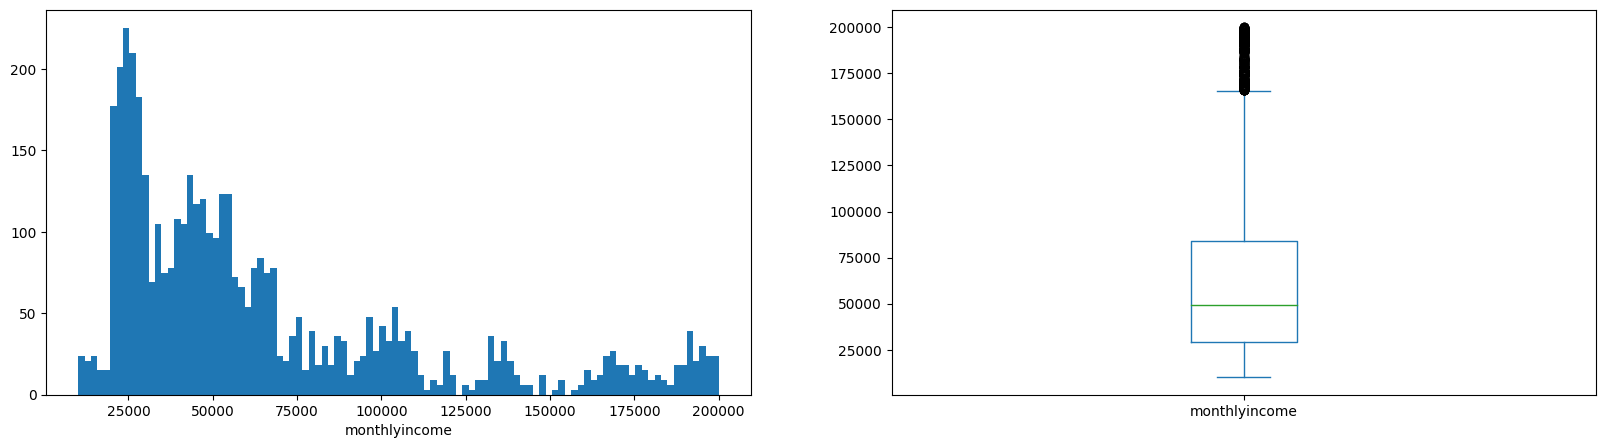

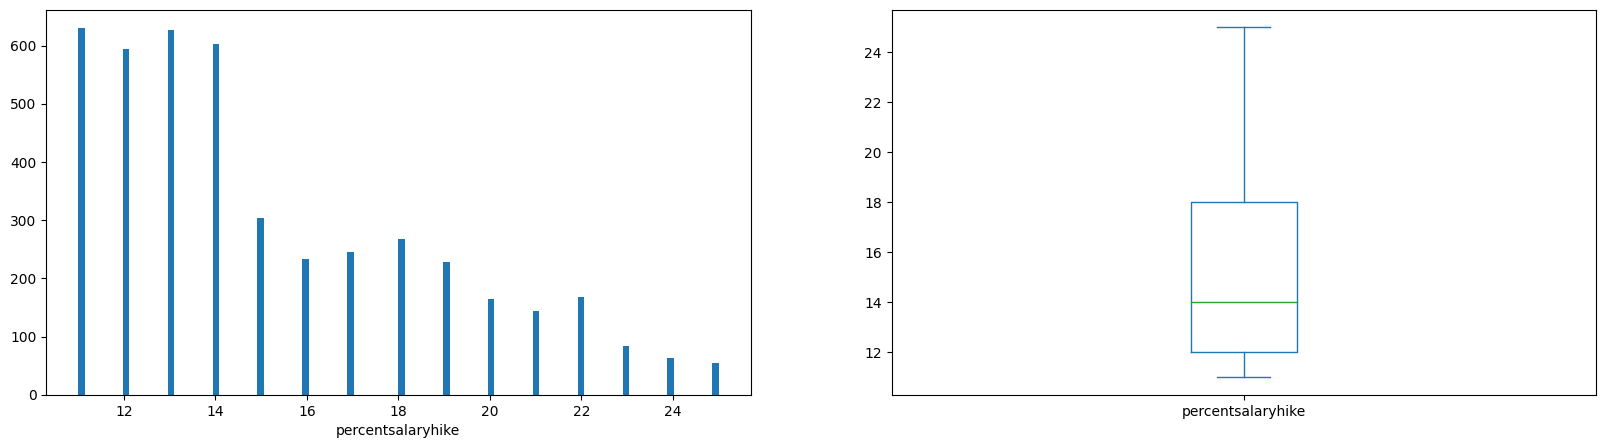

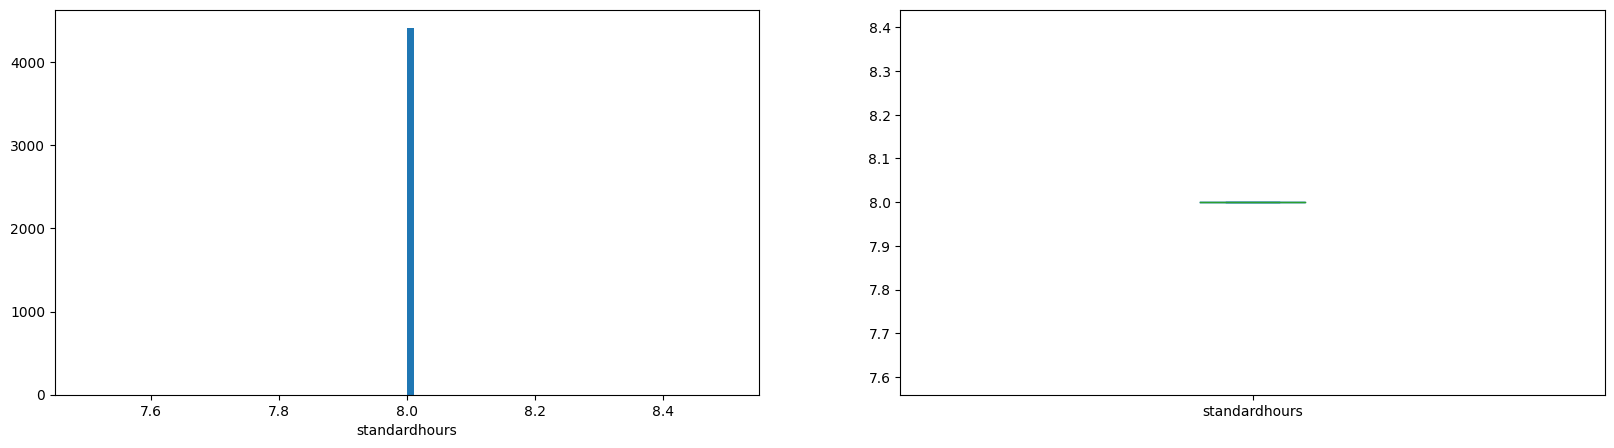

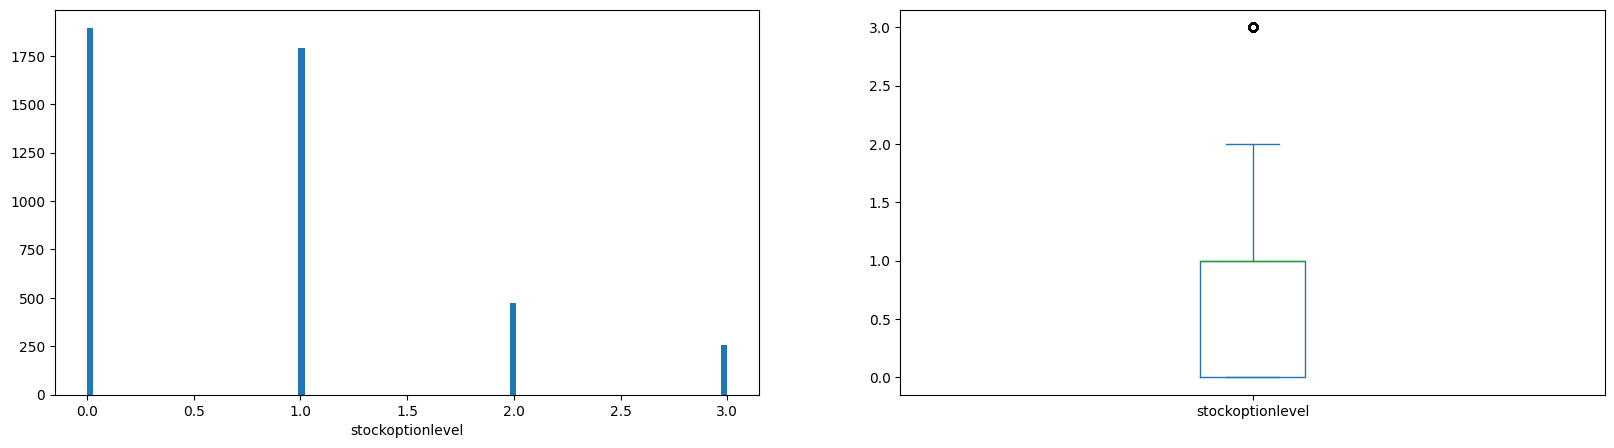

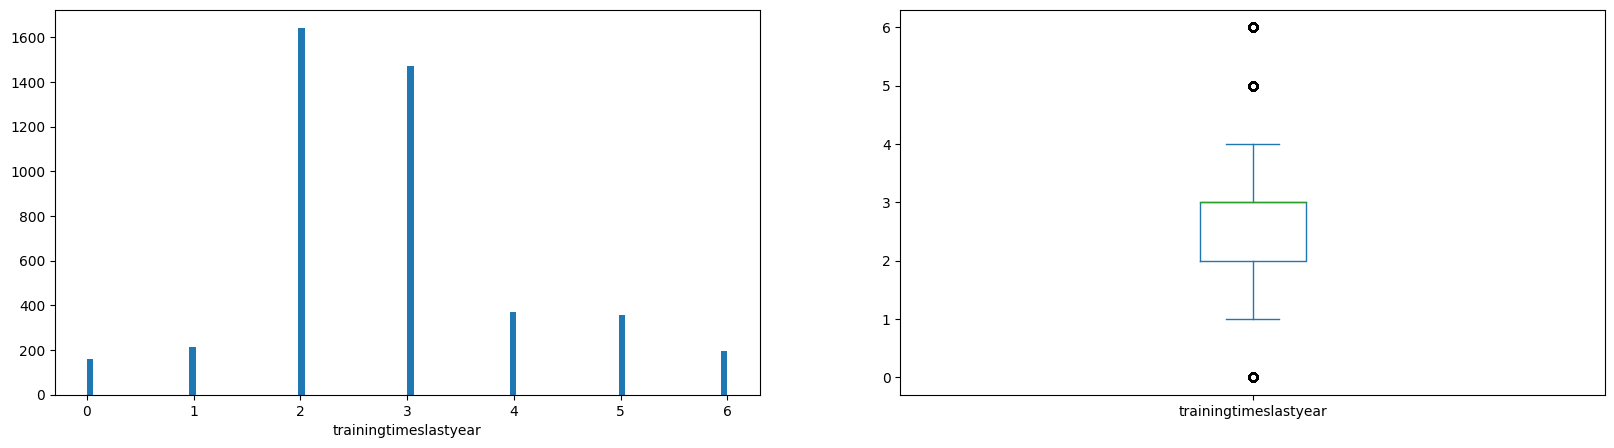

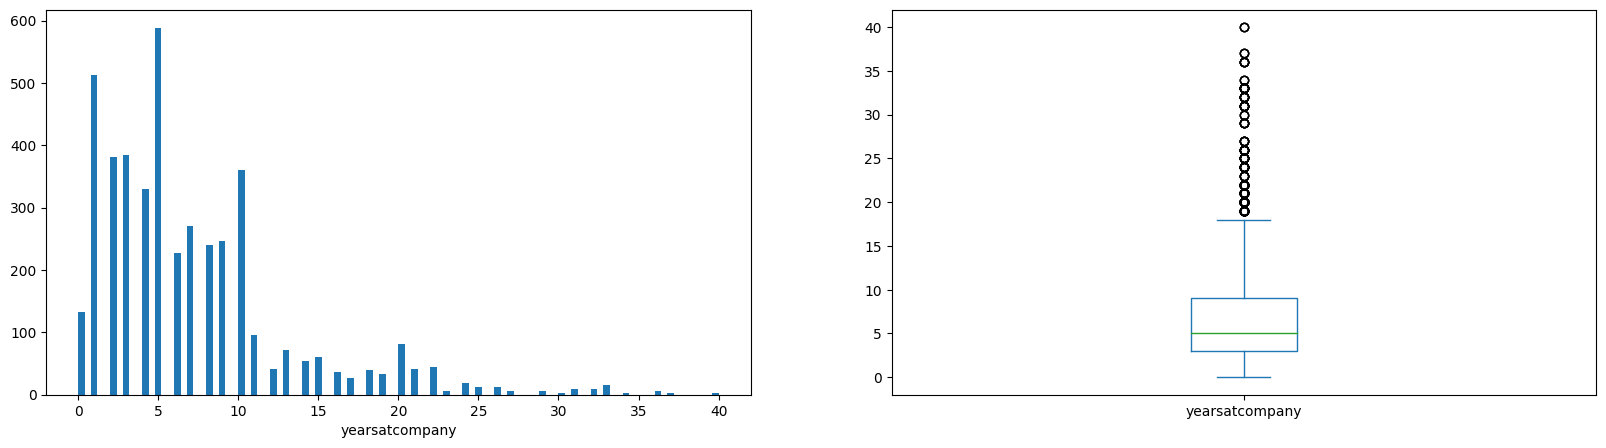

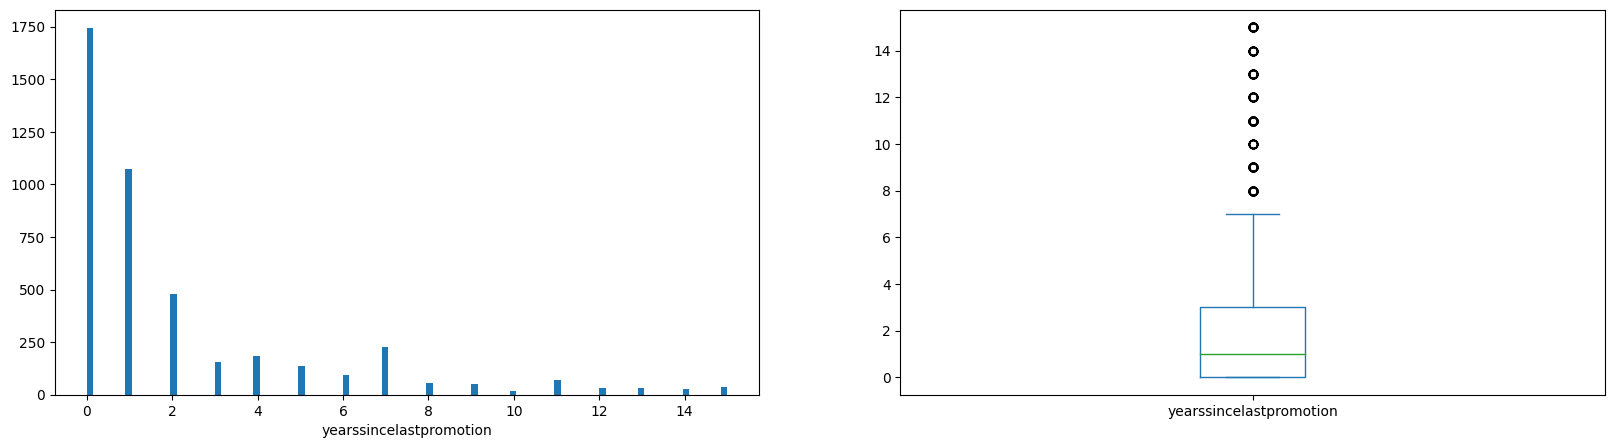

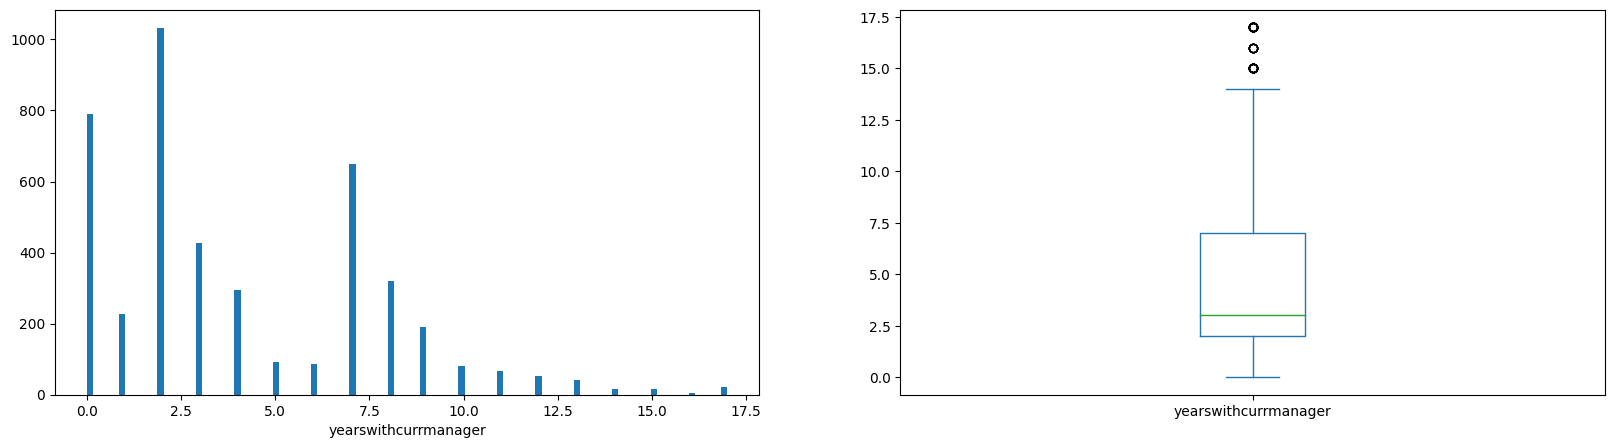

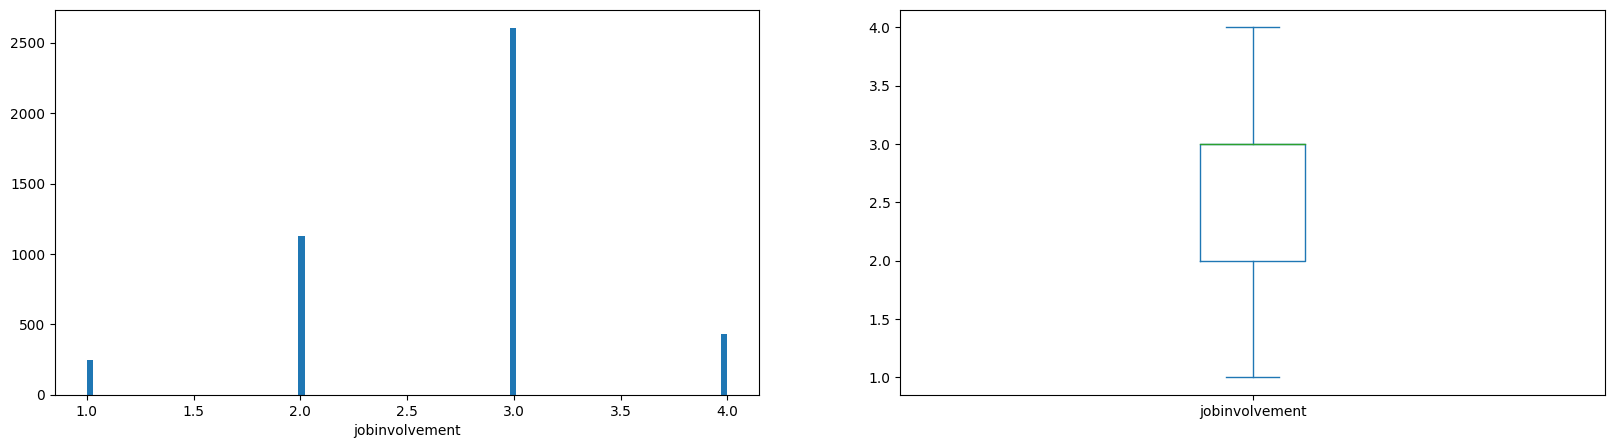

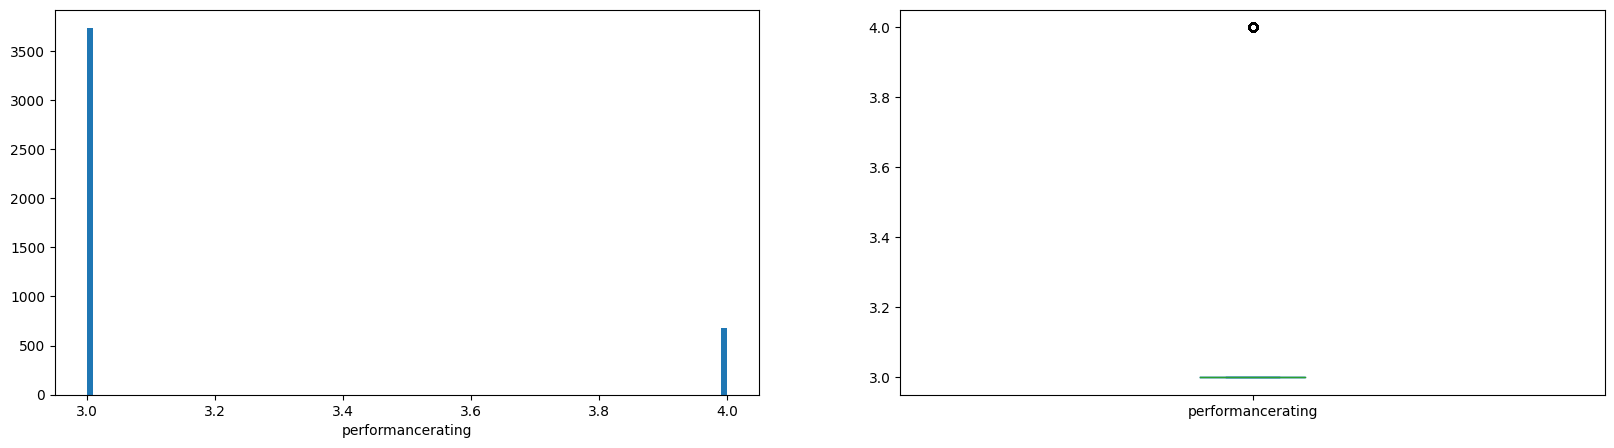

In [ ]:
#COLUMNAS NUMERICAS ENTERAS
X_int2015=r_2015.select_dtypes(include=['int64'])
# X_int


for variable in X_int2015:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2015[variable].plot(kind='box')

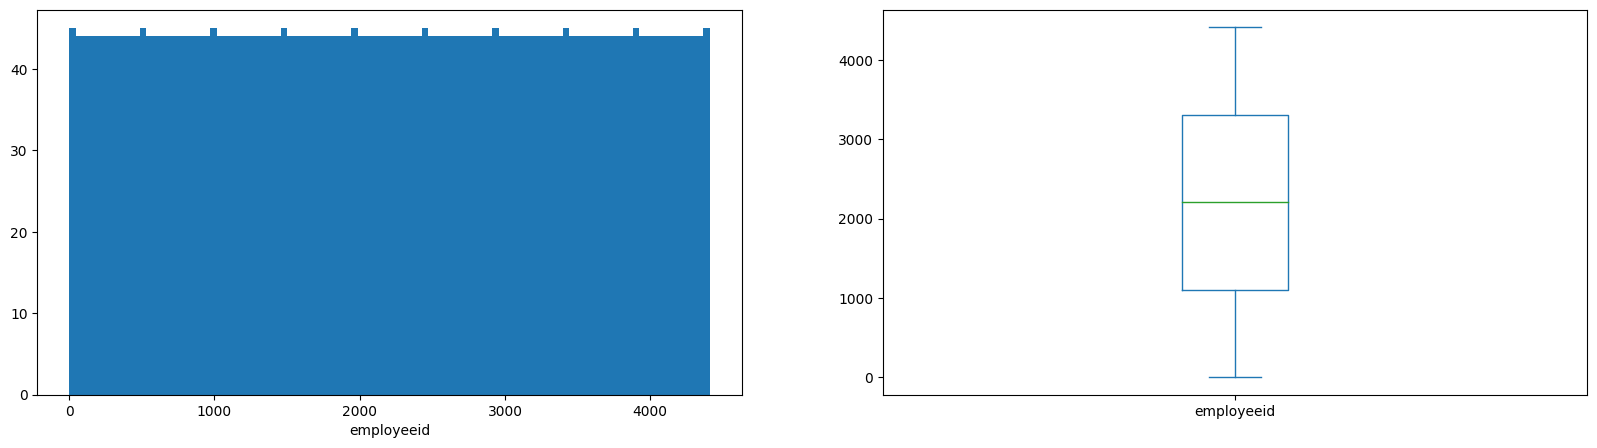

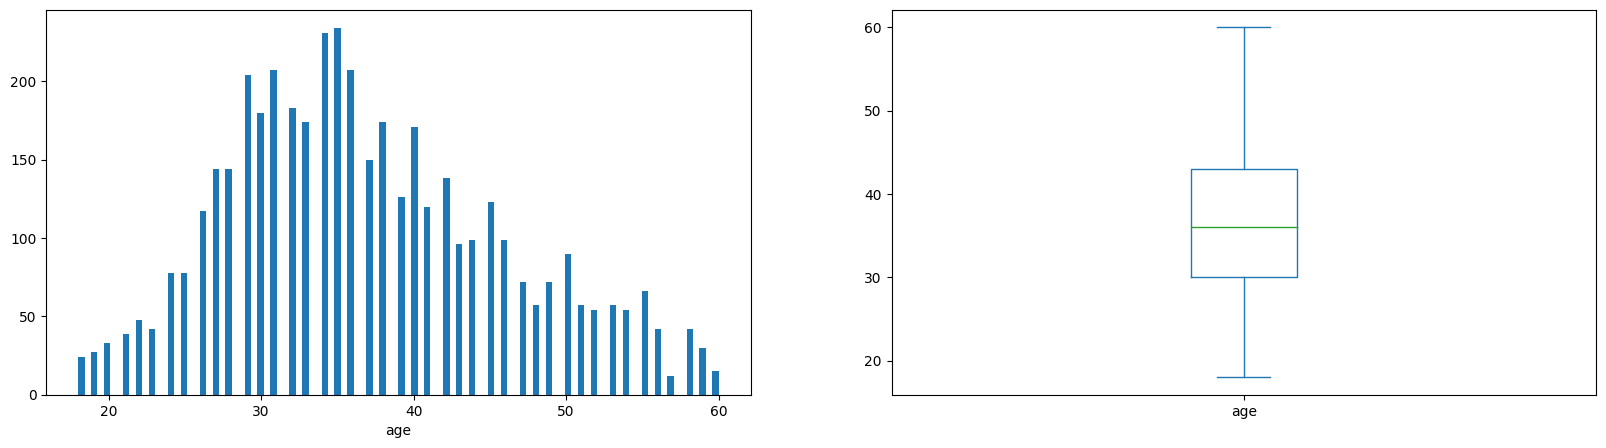

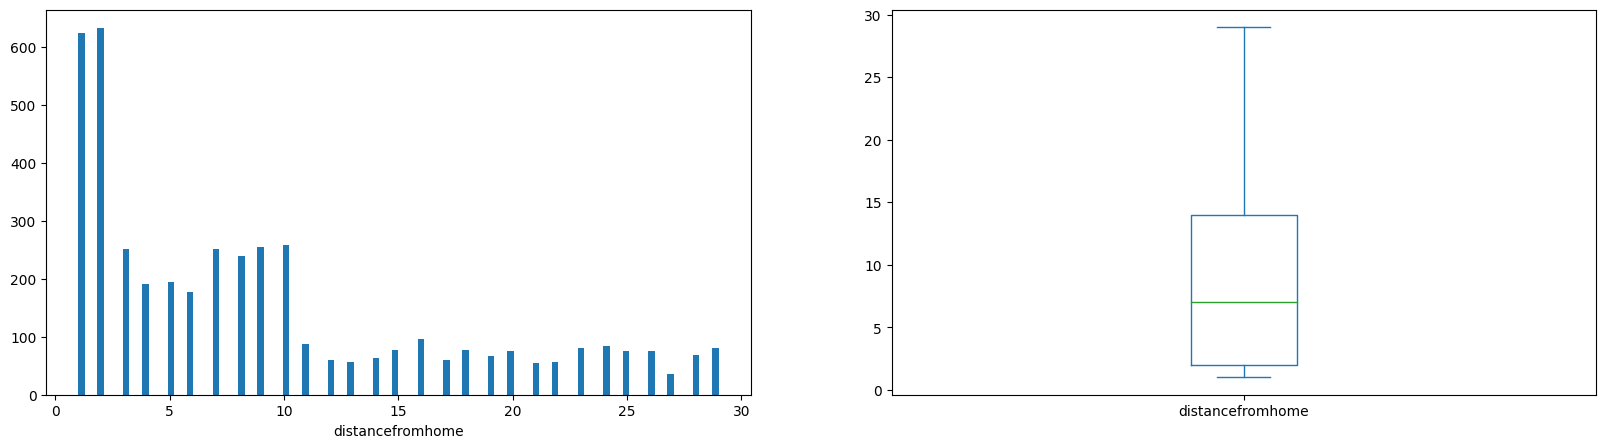

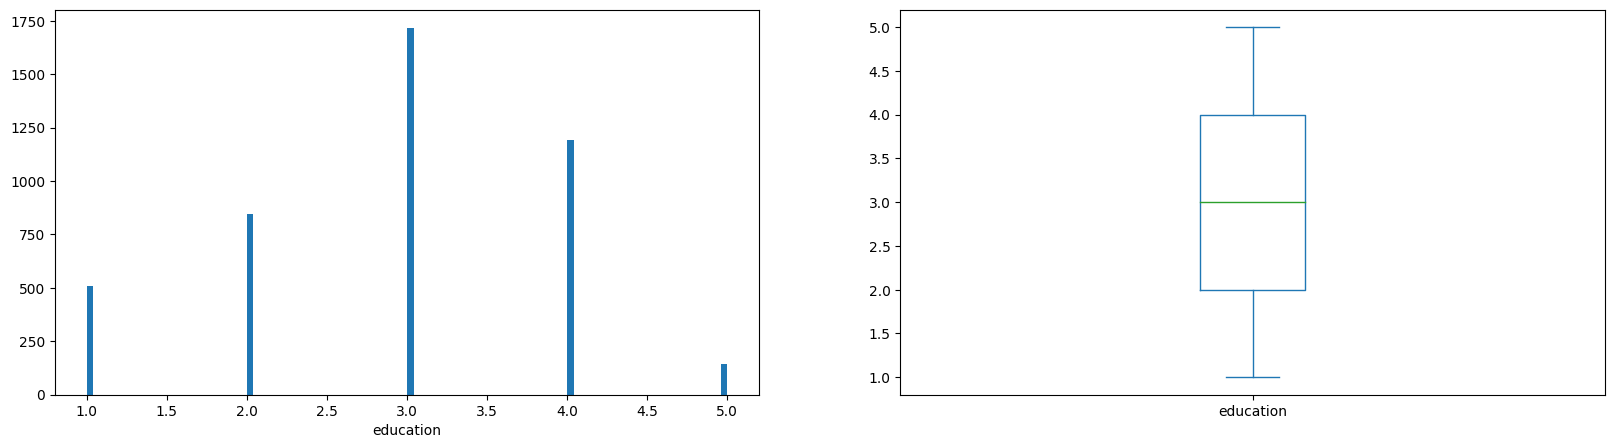

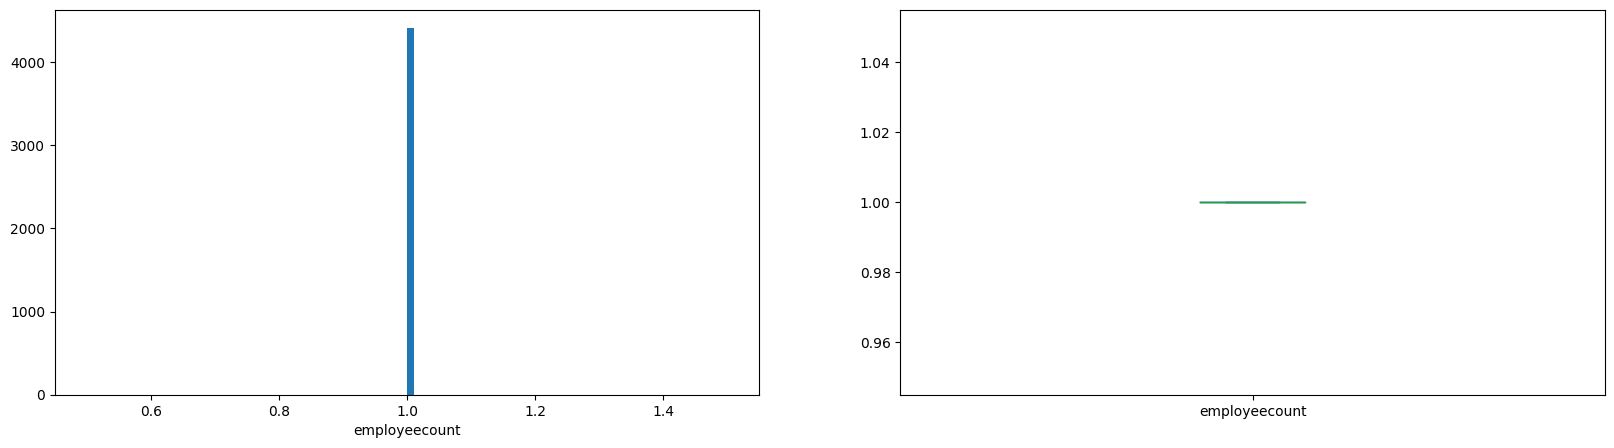

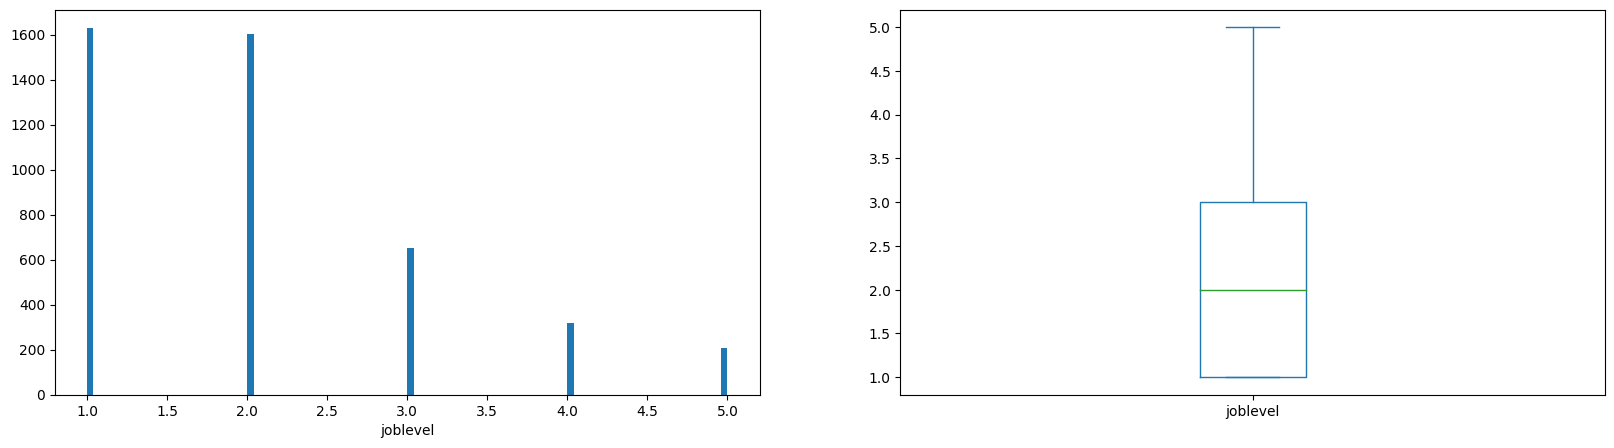

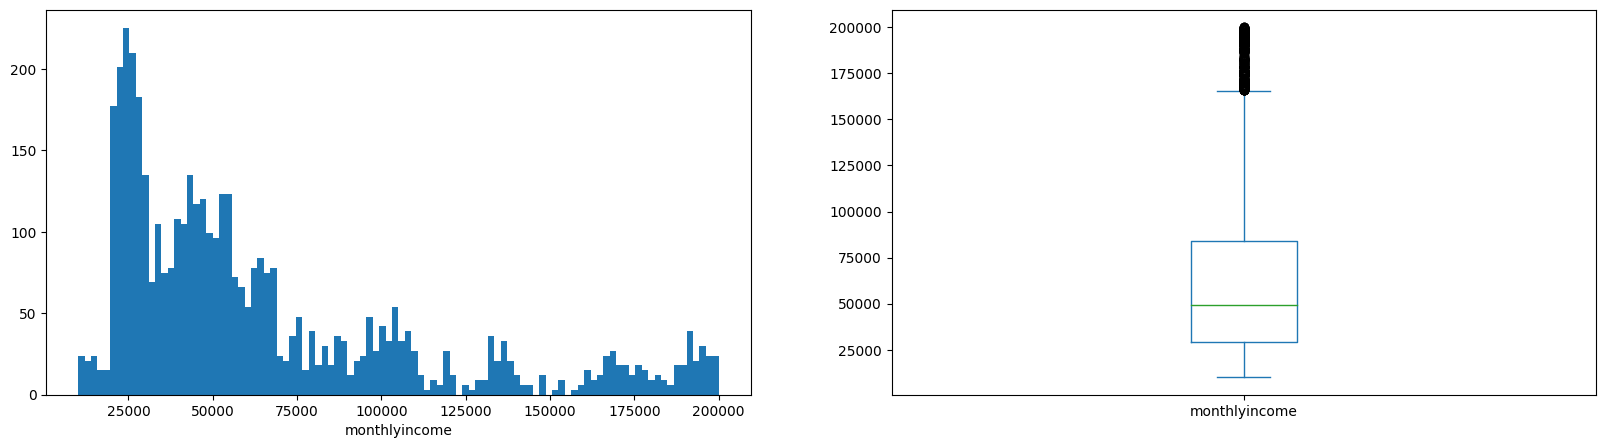

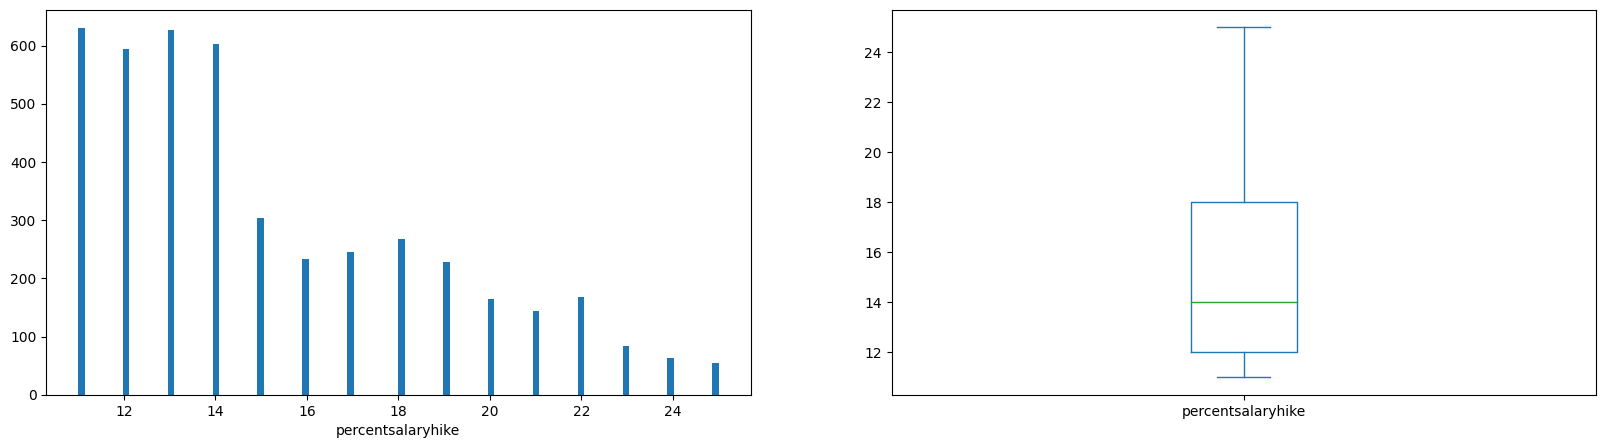

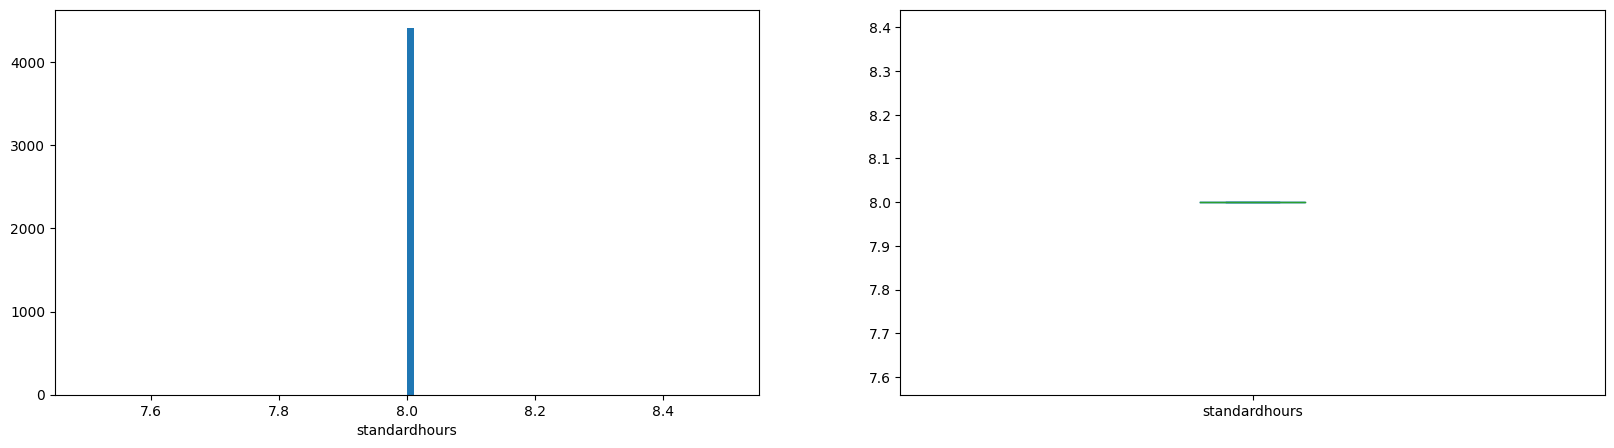

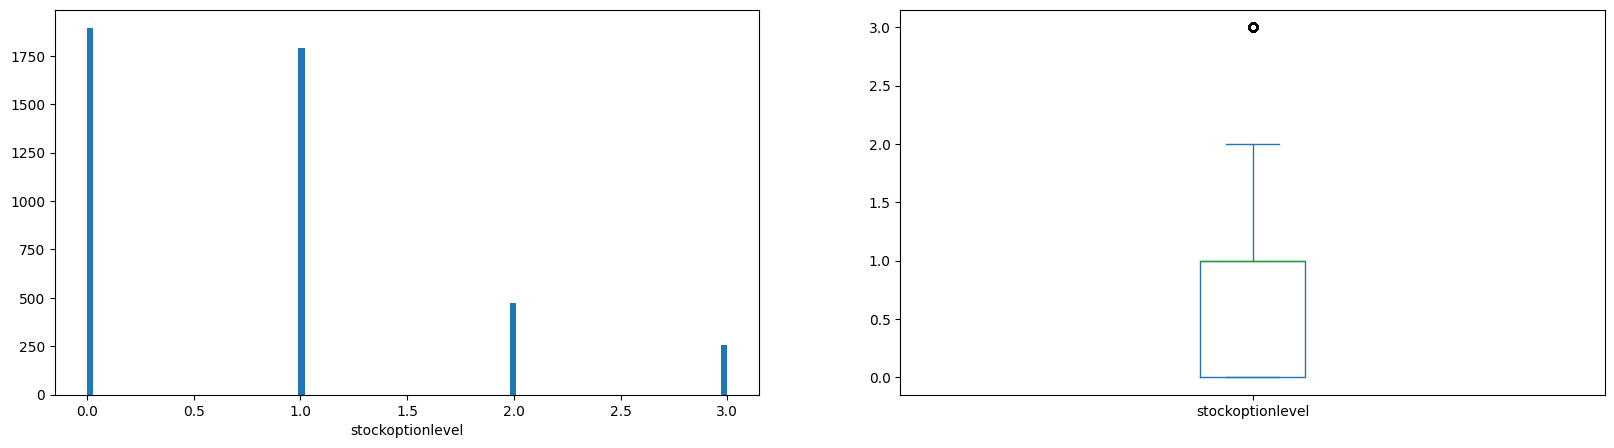

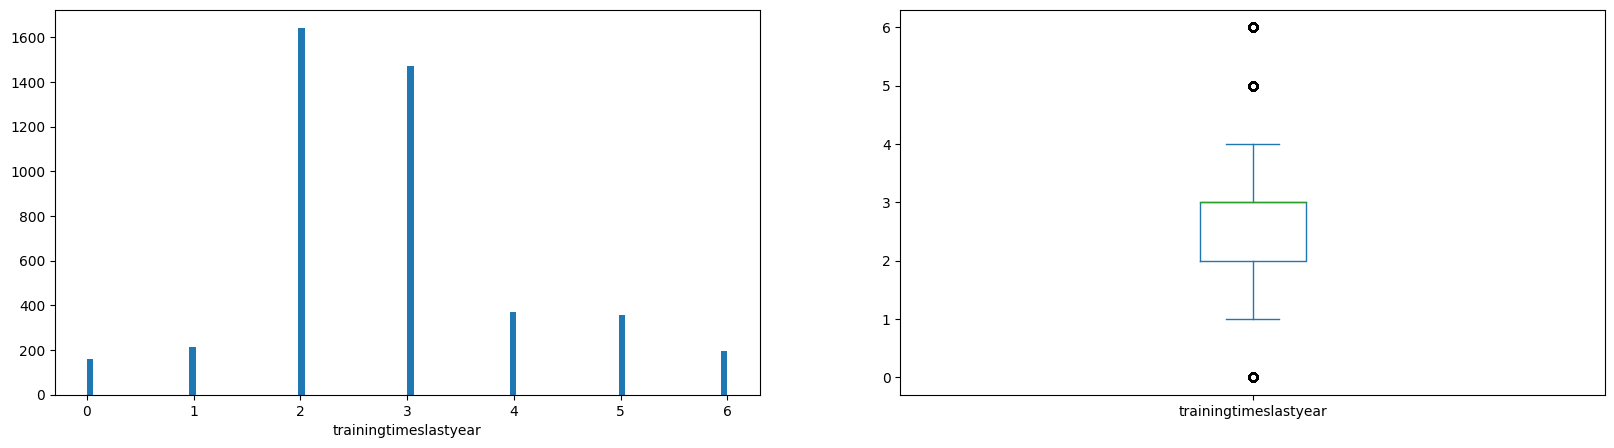

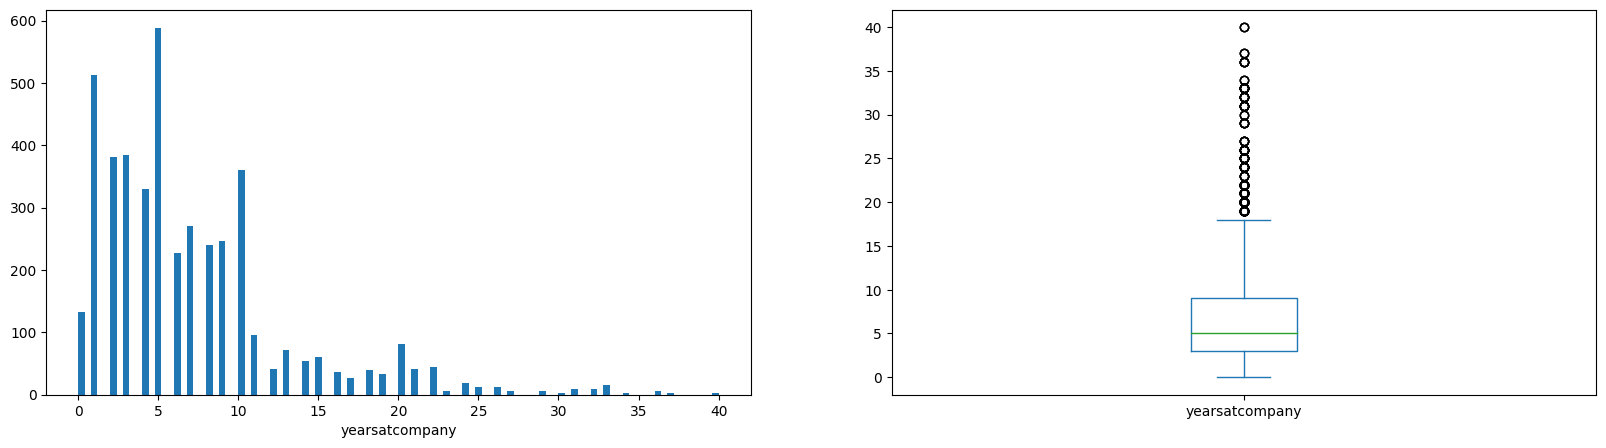

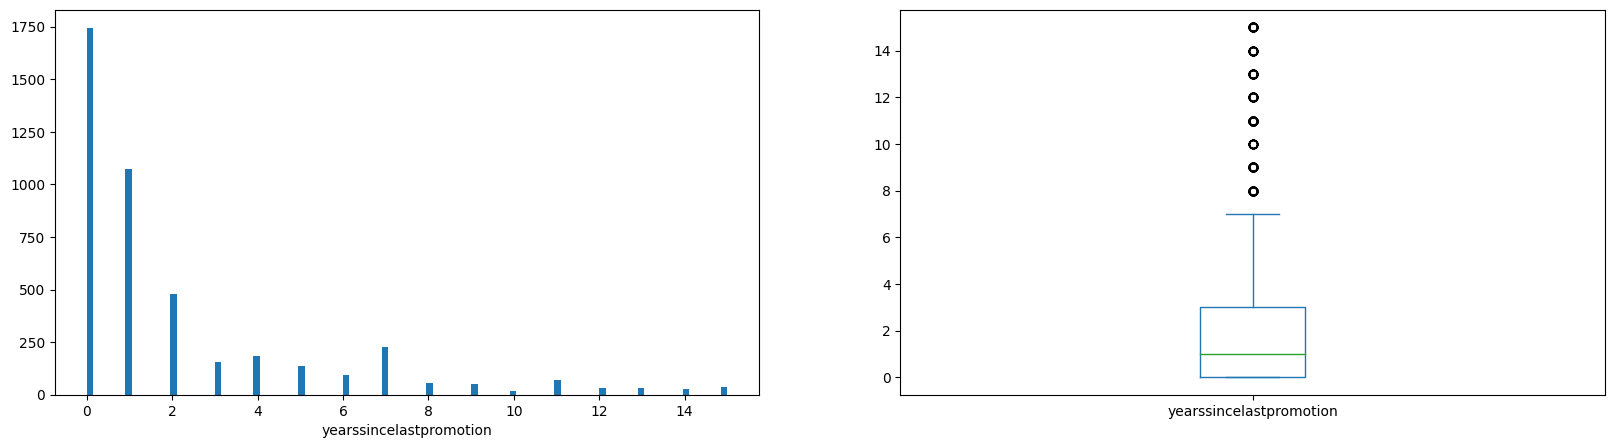

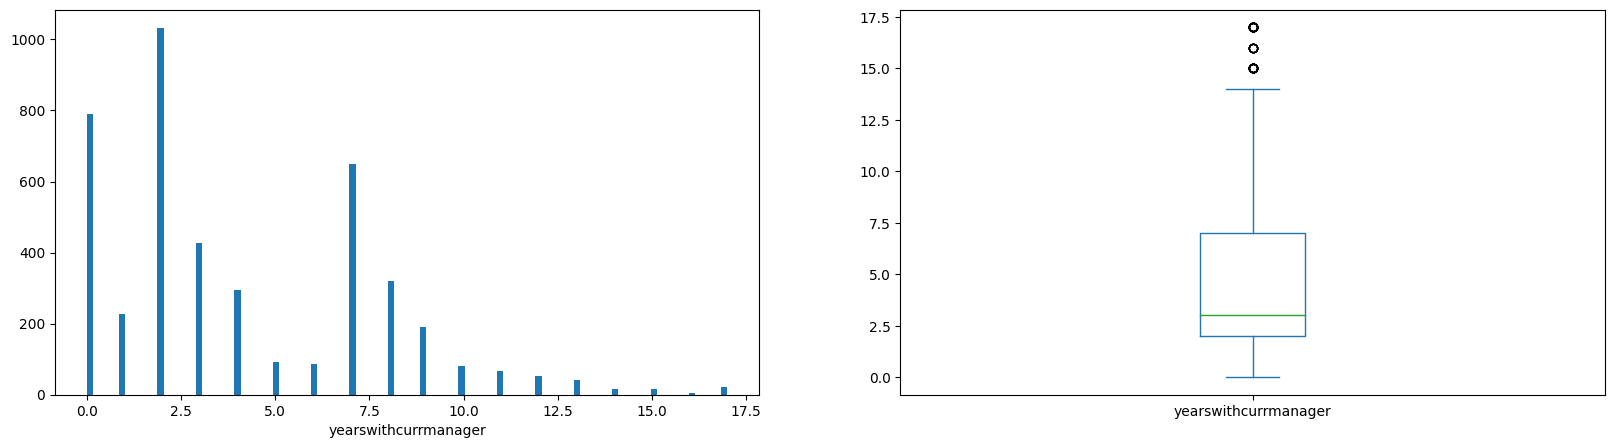

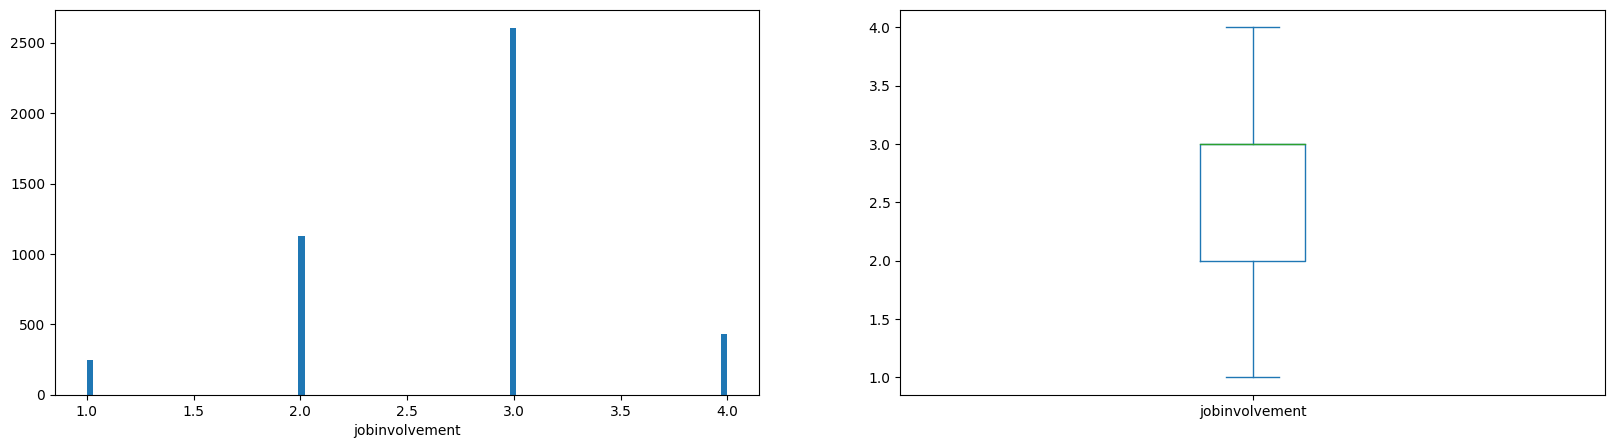

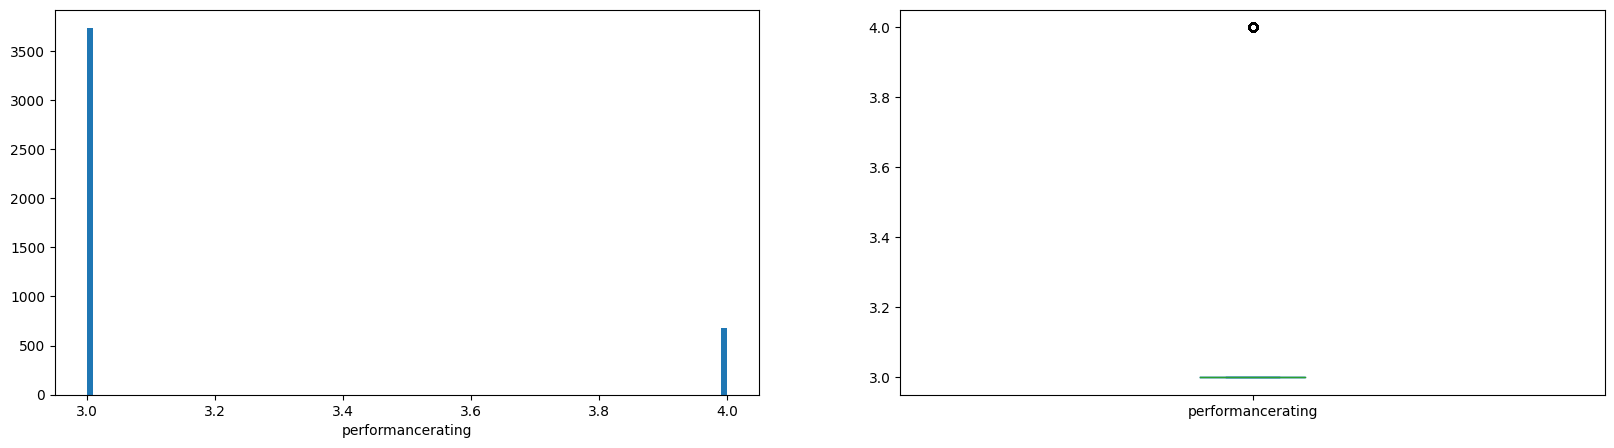

In [ ]:
#COLUMNAS NUMERICAS ENTERAS
X_int2016=r_2016.select_dtypes(include=['int64'])
# X_int


for variable in X_int2016:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2016[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2016[variable].plot(kind='box')

In [ ]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t=pd.concat([X_int2015["stockoptionlevel"],X_int2015["performancerating"],X_int2015["jobinvolvement"],X_int2015["joblevel"],X_int2015["education"]],axis=1)
t=t.astype(str)
t=pd.get_dummies(t)
X_object_t=pd.concat([X_int2015, t], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2015["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2015["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2015["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2015["joblevel"].unique())
print("Categorias de Education: ", X_int2015["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2015["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2015.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2015=X_int2015.astype(int)
X_int2015.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,employeeid,age,distancefromhome,employeecount,monthlyincome,percentsalaryhike,standardhours,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,1,51,6,1,131160,11,8,6,1,0,0
1,2,31,10,1,41890,23,8,3,5,1,4
2,3,32,17,1,193280,15,8,2,5,0,3
3,4,38,2,1,83210,11,8,5,8,7,5
4,5,32,10,1,23420,12,8,2,6,0,4


In [ ]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t=pd.concat([X_int2016["stockoptionlevel"],X_int2016["performancerating"],X_int2016["jobinvolvement"],X_int2016["joblevel"],X_int2016["education"]],axis=1)
t=t.astype(str)
t=pd.get_dummies(t)
X_object_t=pd.concat([X_int2016, t], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2016["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2016["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2016["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2016["joblevel"].unique())
print("Categorias de Education: ", X_int2016["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2016["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2016.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2016=X_int2016.astype(int)
X_int2016.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,employeeid,age,distancefromhome,employeecount,monthlyincome,percentsalaryhike,standardhours,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,1,51,6,1,131160,11,8,6,1,0,0
1,2,31,10,1,41890,23,8,3,5,1,4
2,3,32,17,1,193280,15,8,2,5,0,3
3,4,38,2,1,83210,11,8,5,8,7,5
4,5,32,10,1,23420,12,8,2,6,0,4


In [ ]:
#COLUMNAS OBJECT
X_object2015=r_2015.select_dtypes(include=['object'])
X_object2016=r_2016.select_dtypes(include=['object'])

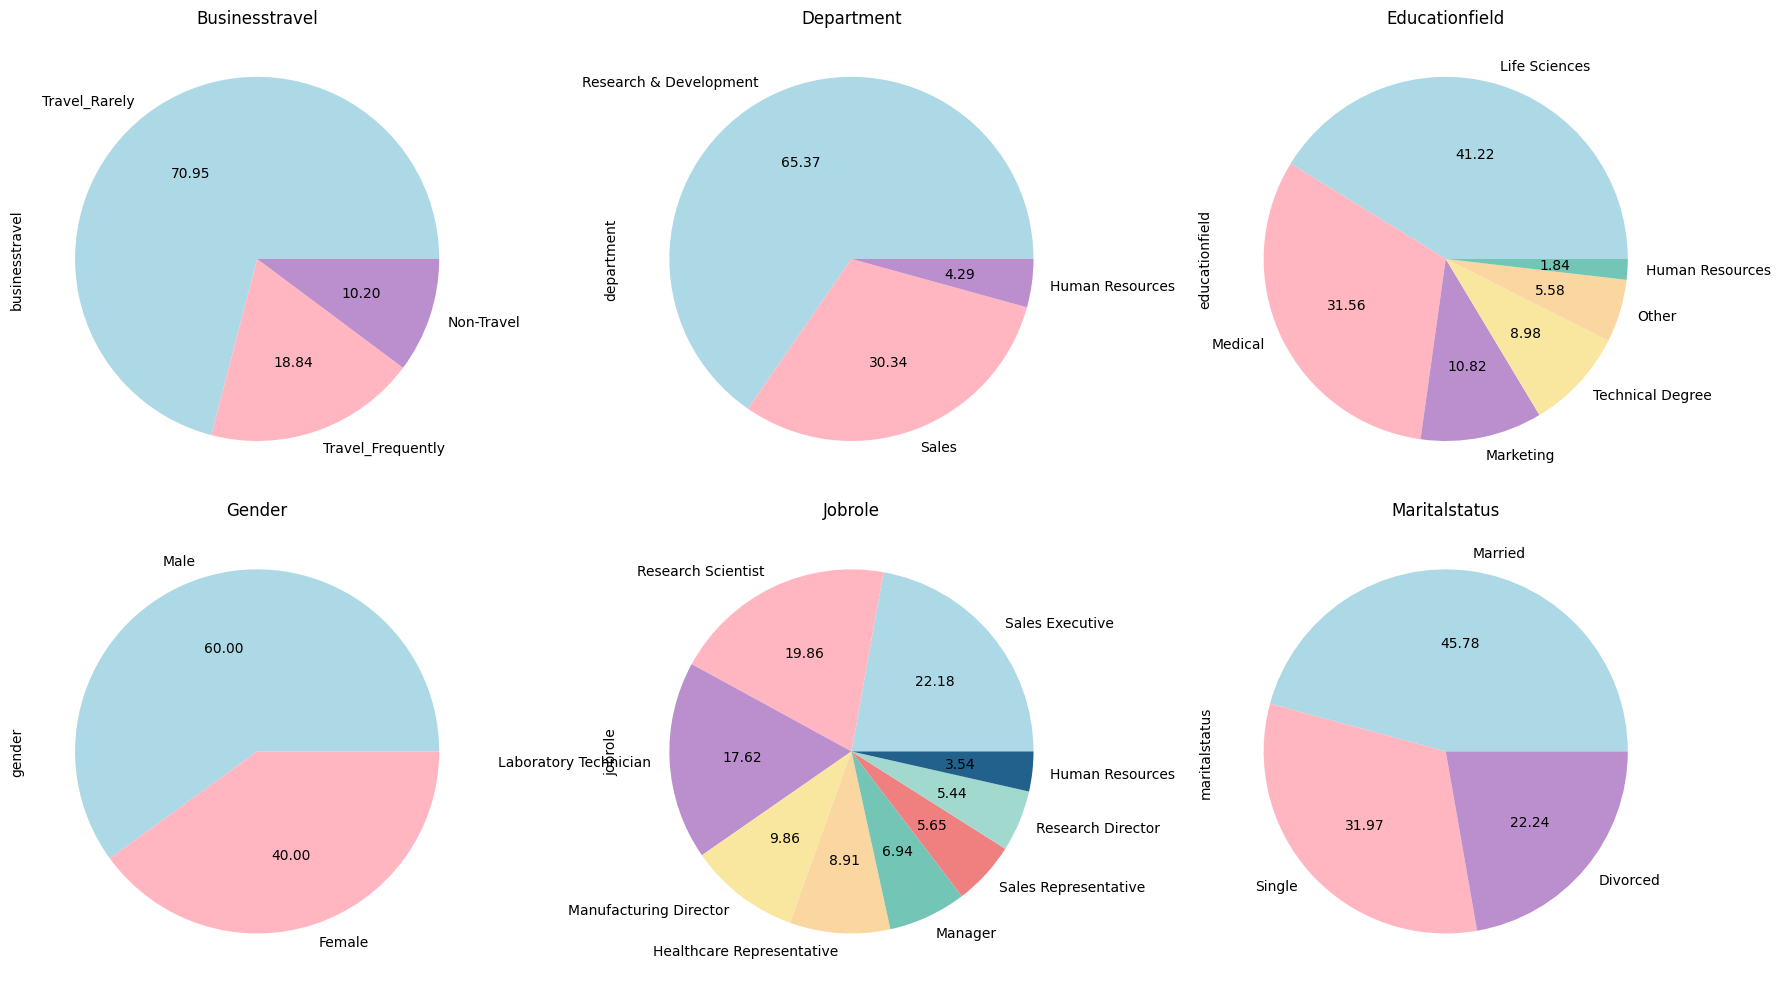

In [ ]:
# Crear una figura con subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Gráfico de pastel para 'businesstravel'
r_2015['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel')

# Gráfico de pastel para 'department'
r_2015['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department')

# Gráfico de pastel para 'educationfield'
r_2015['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('Educationfield')

# Gráfico de pastel para 'gender'
r_2015['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 0])
axes[1, 0].set_title('Gender')

# Gráfico de pastel para 'jobrole'
r_2015['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[1, 1])
axes[1, 1].set_title('Jobrole')

# Gráfico de pastel para 'maritalstatus'
r_2015['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[1, 2])
axes[1, 2].set_title('Maritalstatus')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
ttt=pd.concat([X_object2015["maritalstatus"],X_object2015["gender"],X_object2015["department"],X_object2015["businesstravel"]], ,axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt=ttt.astype(str)# se cambia el tipo de datos a string
ttt=pd.get_dummies(ttt)# se convirten a dummies
X_object_t=pd.concat([X_object2015, ttt], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de maritalstatus: ", X_object2015["maritalstatus"].unique())
print("Categorias de gender: ", X_object2015["gender"].unique())
print("Categorias de department: ", X_object2015["department"].unique())
print("Categorias de busisnesstravel: ", X_object2015["businesstravel"].unique())

Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [ ]:
X_object_t.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto

In [ ]:
X_float2015 = r_2015.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float2015

,environmentsatisfaction,jobsatisfaction,worklifebalance,numcompaniesworked,totalworkingyears
0,3.0,4.0,2.0,1.0,1.0
1,3.0,2.0,4.0,0.0,6.0
2,2.0,2.0,1.0,1.0,5.0
3,4.0,4.0,3.0,3.0,13.0
4,4.0,1.0,3.0,4.0,9.0
...,...,...,...,...,...
4405,4.0,1.0,3.0,3.0,10.0
4406,4.0,4.0,3.0,2.0,10.0
4407,1.0,3.0,3.0,0.0,5.0
4408,4.0,1.0,3.0,0.0,10.0


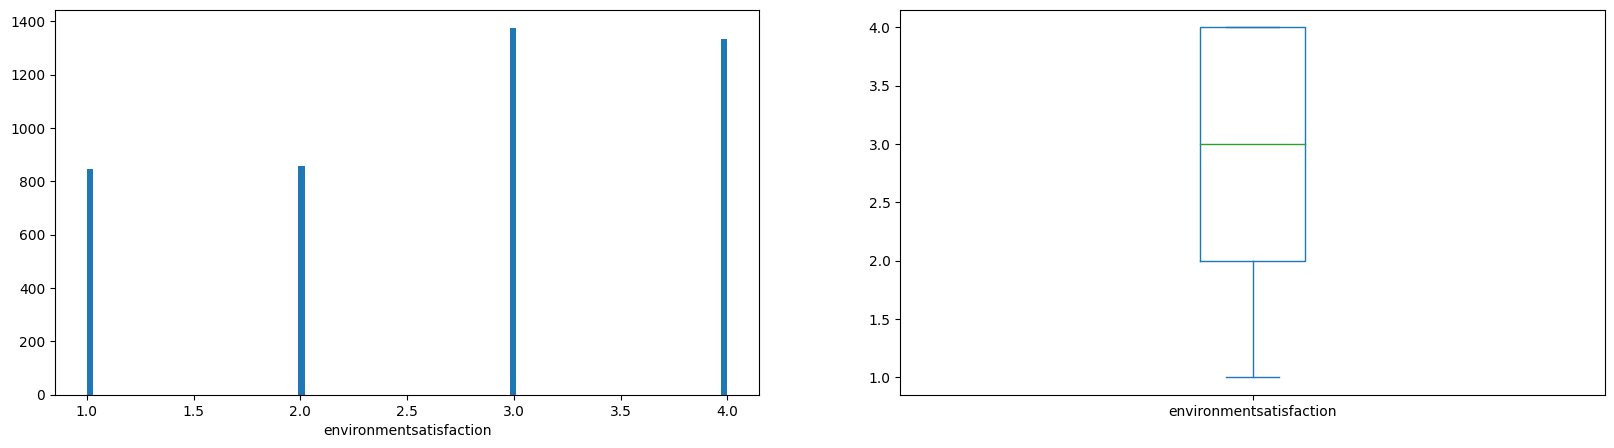

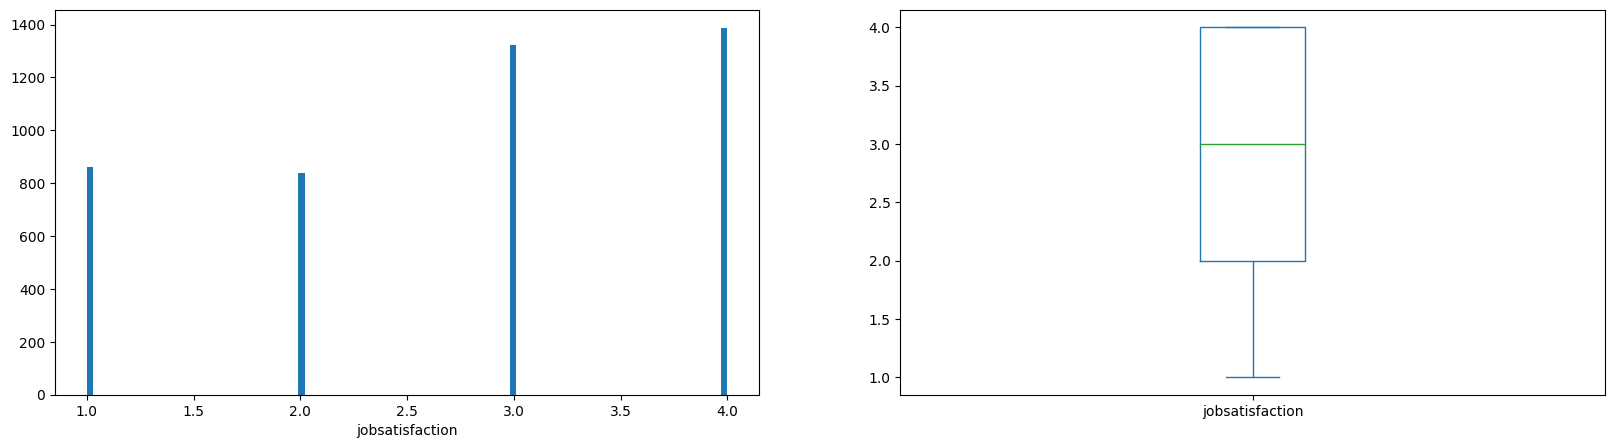

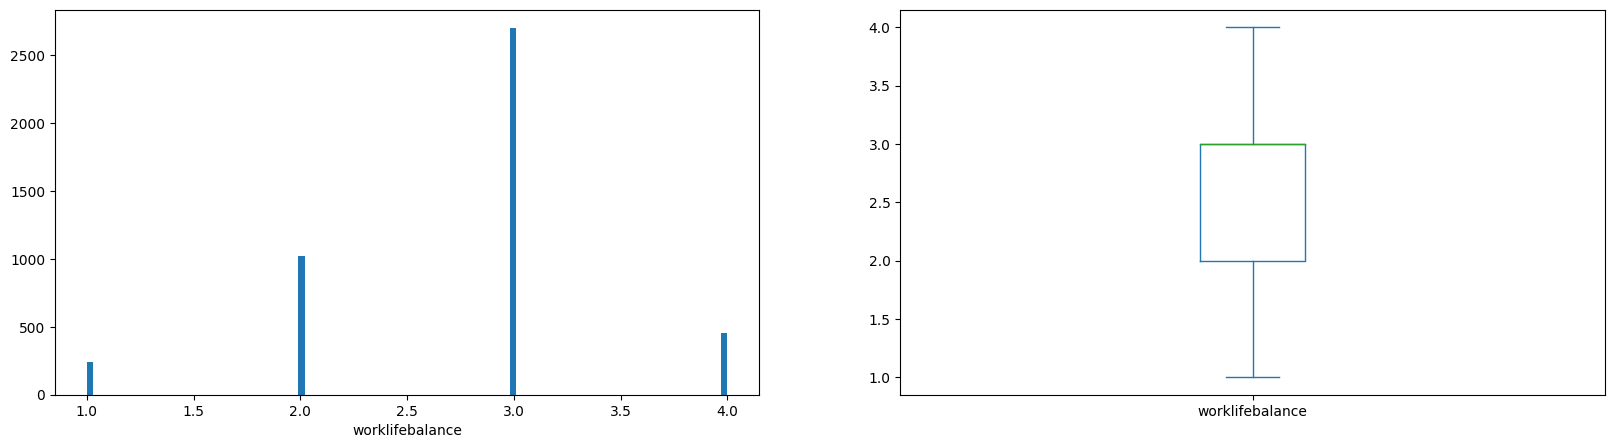

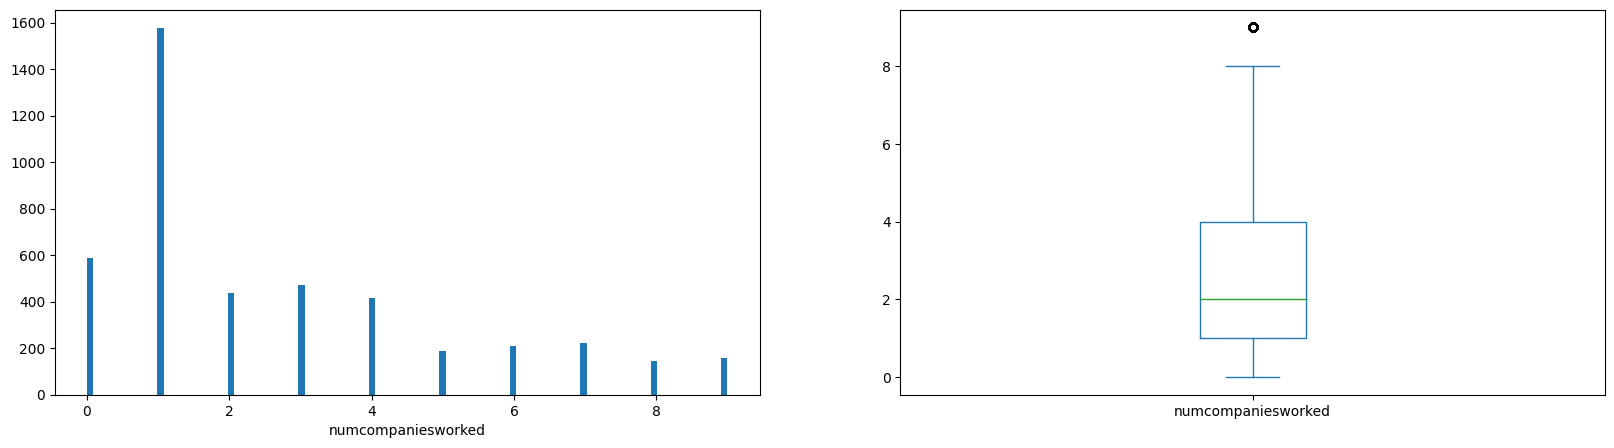

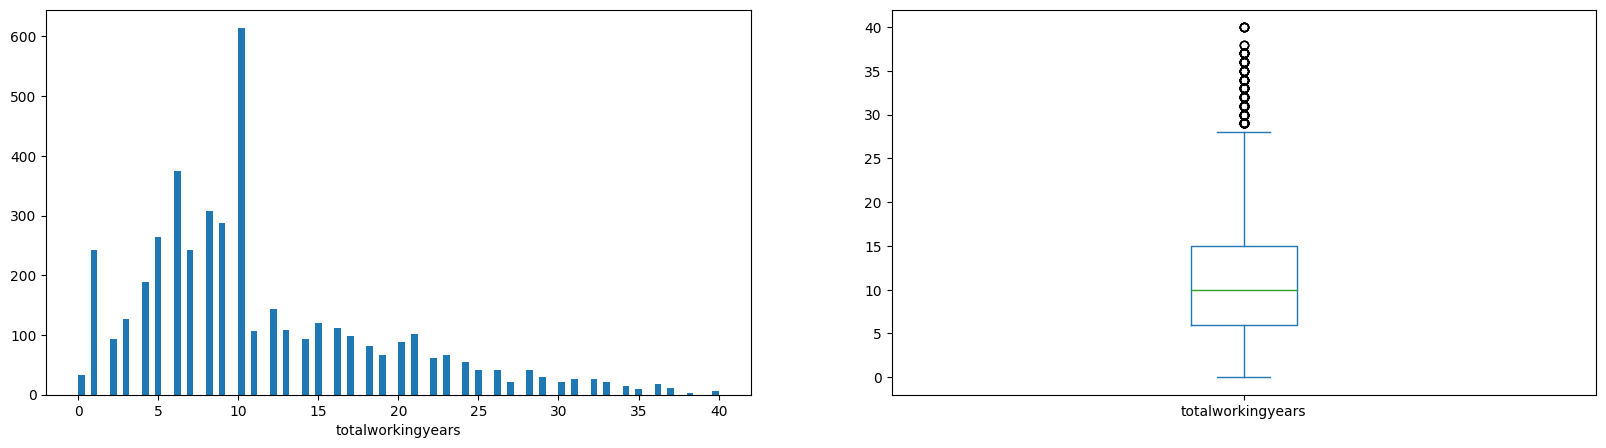

In [ ]:
for variable in X_float2015: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float2015[variable].plot(kind='box')

In [ ]:
tt=pd.concat([X_float2015["environmentsatisfaction"],X_float2015["jobsatisfaction"],X_float2015["worklifebalance"]],axis=1)
tt=tt.astype(str)
tt=pd.get_dummies(tt)
X_object_t=pd.concat([X_object_t, tt], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float2015.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)
